In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('student_performance.csv')
df

,Student_ID,Study_Hours,Attendance,Exam_Score,Performance
0,1,5.993428,65.846293,80.366810,Average
1,2,4.723471,75.793547,83.411768,Weak
2,3,6.295377,76.572855,91.245769,Strong
3,4,8.046060,71.977227,90.807031,Strong
4,5,4.531693,78.387143,54.334959,Strong
...,...,...,...,...,...
95,96,2.072970,83.853174,64.606356,Average
96,97,5.592241,71.161426,88.493998,Average
97,98,5.522111,81.537251,79.609493,Average
98,99,5.010227,80.582087,87.192932,Average



# 1. آمار توصیفی
 هدف: خلاصه‌سازی داده‌ها برای درک بهتر ویژگی‌های آن‌ها (میانگین، میانه، انحراف معیار و ...)
 

In [3]:
df.describe()

,Student_ID,Study_Hours,Attendance,Exam_Score
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,4.794702,80.085659,75.323647
std,29.011492,1.809781,9.201252,14.806682
min,1.000000,0.000000,60.812288,26.380990
25%,25.750000,3.798189,71.943395,65.168347
50%,50.500000,4.746087,80.841072,76.465436
75%,75.250000,5.811904,85.381704,85.566562
max,100.000000,8.704556,100.000000,100.000000


In [4]:
# انتخاب ستون‌های عددی برای محاسبات آماری (برای جلوگیری از خطا در ستون‌های غیرعددی)
numeric_cols = ['Study_Hours', 'Attendance', 'Exam_Score']

In [5]:
# چولگی (Skewness): نشان‌دهنده تقارن یا عدم تقارن توزیع داده‌ها
print(df[numeric_cols].skew())

Study_Hours   -0.153790
Attendance     0.196528
Exam_Score    -0.407253
dtype: float64


In [6]:
# کشیدگی (Kurtosis): نشان‌دهنده پهن بودن توزیع داده‌ها
print(df[numeric_cols].kurt())

Study_Hours   -0.170204
Attendance    -0.445571
Exam_Score     0.077096
dtype: float64


In [7]:
print(df['Performance'].value_counts())

Performance
Average    40
Strong     38
Weak       22
Name: count, dtype: int64


# 2. (Outliers) 
 هدف: شناسایی مقادیر غیرعادی که ممکن است تحلیل را تحت تأثیر قرار دهند

In [9]:
def detect_outliers_iqr(data, column):
    """
    شناسایی ناهنجاری‌ها با استفاده از روش IQR
    ورودی‌ها:
        data: دیتافریم پانداس
        column: نام ستون برای بررسی
    خروجی‌ها:
        outliers: مقادیر ناهنجار
        lower_bound: حد پایین IQR
        upper_bound: حد بالای IQR
    """
    Q1 = data[column].quantile(0.25)  # چارک اول
    Q3 = data[column].quantile(0.75)  # چارک سوم
    IQR = Q3 - Q1  # محدوده بین‌چارکی
    lower_bound = Q1 - 1.5 * IQR  # حد پایین
    upper_bound = Q3 + 1.5 * IQR  # حد بالا
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound


=== Outliers in Exam Score ===
Lower bound: 34.57, Upper bound: 116.16
Outliers: [26.3809899]


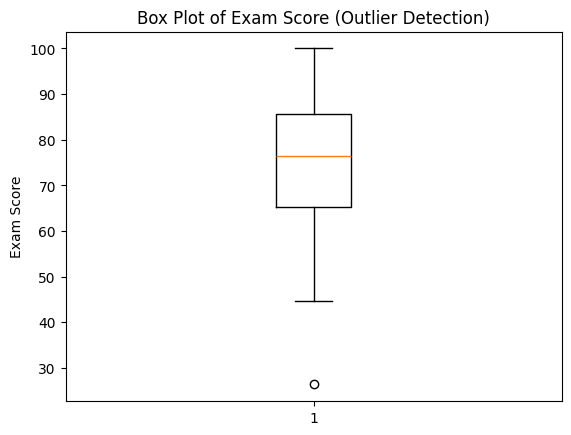

In [10]:
# بررسی ناهنجاری‌ها برای ستون Exam_Score
outliers, lower, upper = detect_outliers_iqr(df, 'Exam_Score')
print("\n=== Outliers in Exam Score ===")
print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
print(f"Outliers: {outliers.values}")

# باکس‌پلات برای نمایش ناهنجاری‌ها در Exam_Score
plt.figure()
plt.boxplot(df['Exam_Score'], vert=True)
plt.title('Box Plot of Exam Score (Outlier Detection)')
plt.ylabel('Exam Score')
plt.show()

# 3. مصورسازی‌ها
 هدف: نمایش بصری داده‌ها برای شناسایی الگوها، توزیع‌ها و روابط


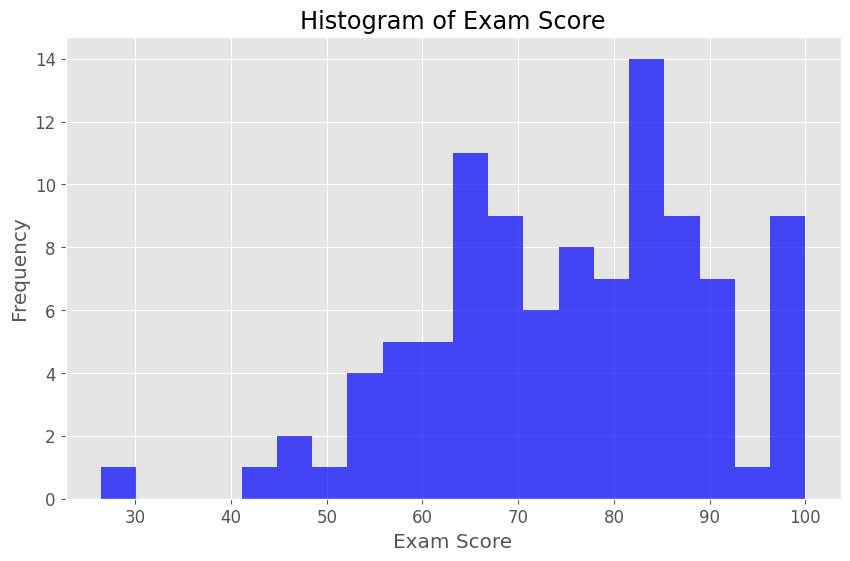

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16932\660507993.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Study_Hours'], df['Attendance'], df['Exam_Score']], labels=['Study Hours', 'Attendance', 'Exam Score'])


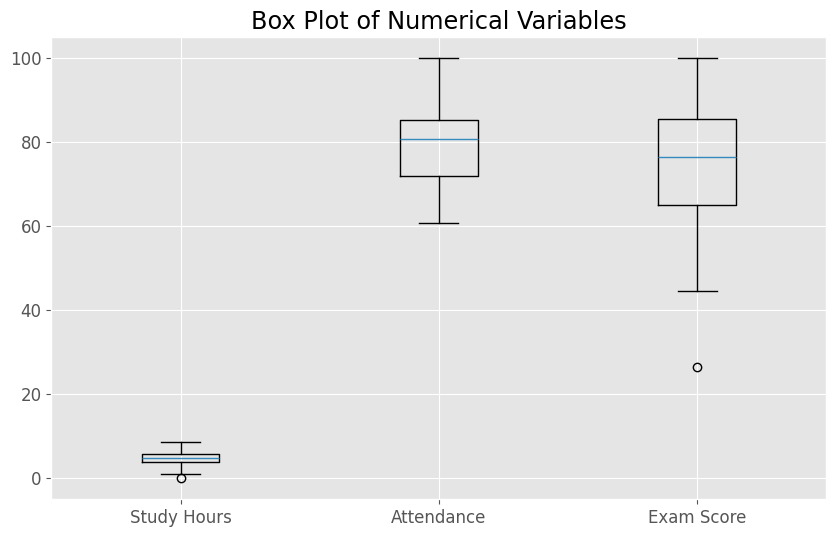

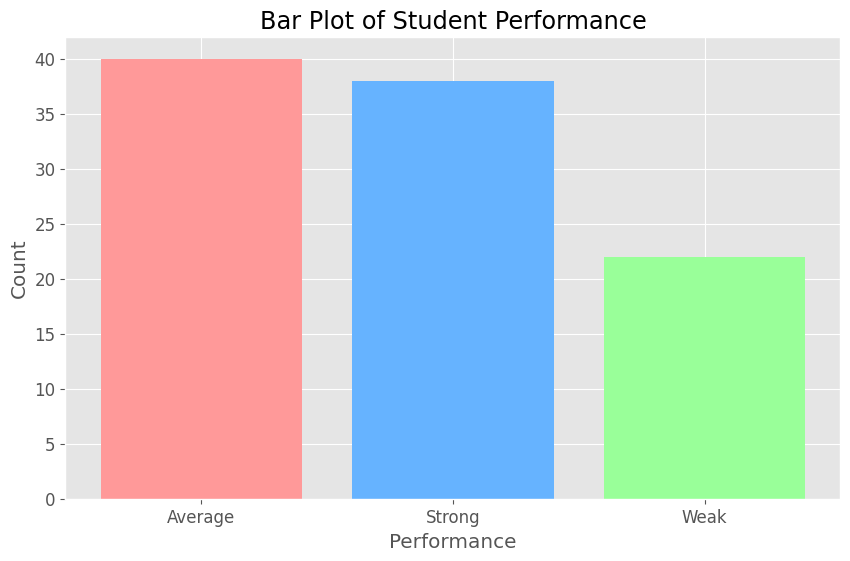

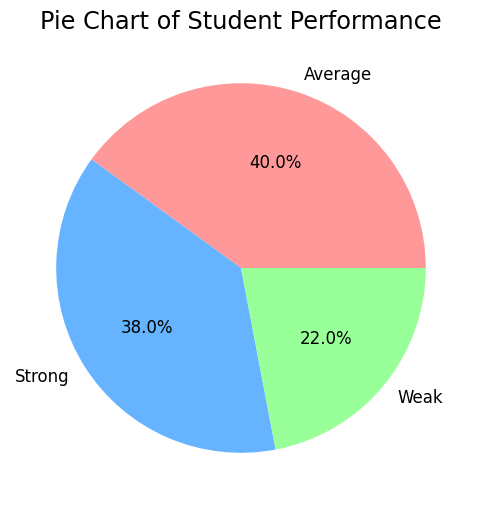

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16932\660507993.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_score_by_hours = df.groupby(study_hours_binned)['Exam_Score'].mean()


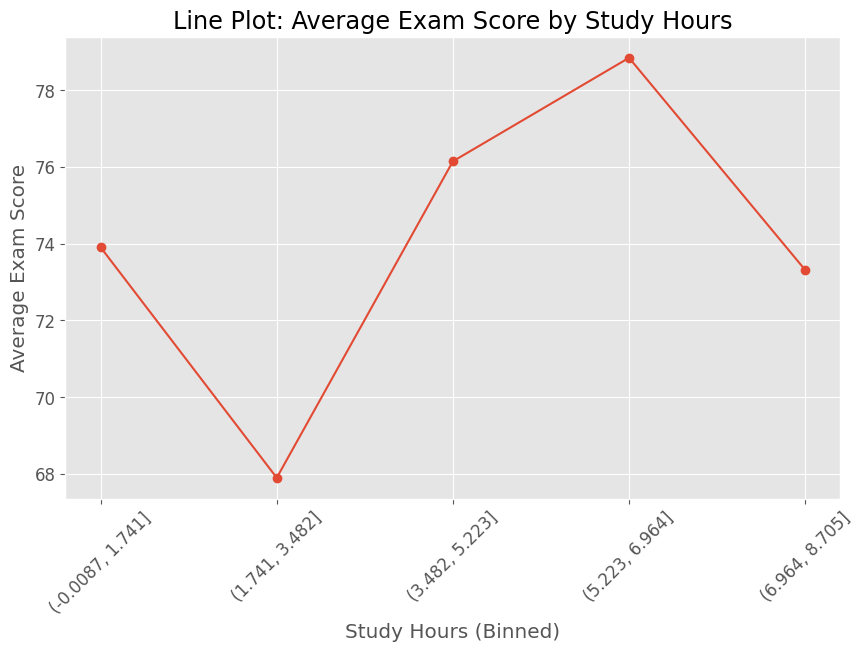

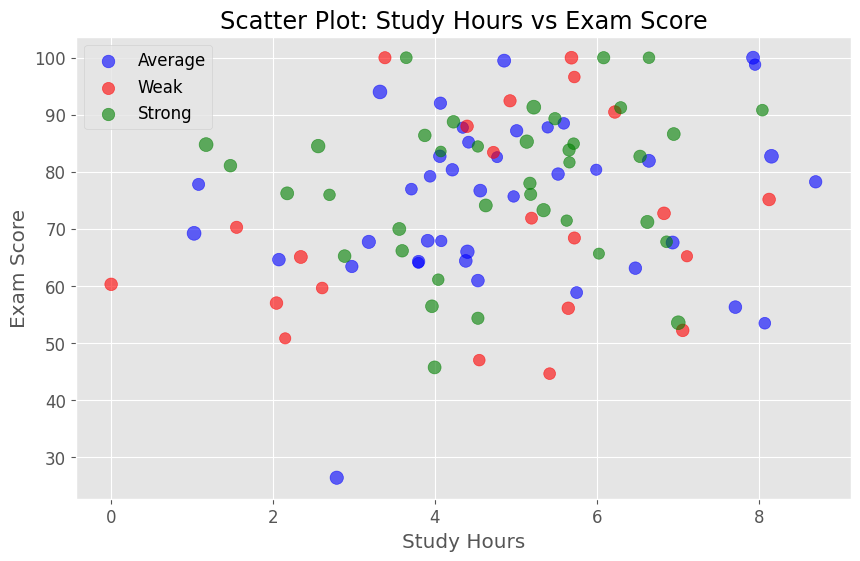

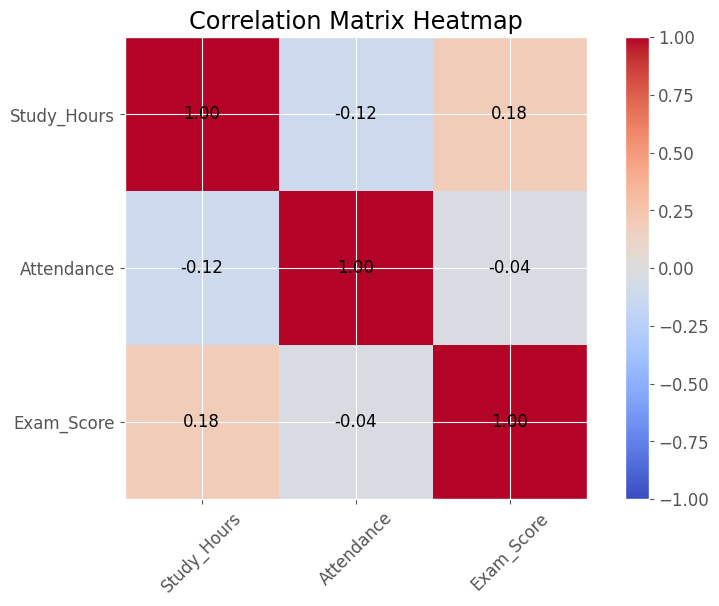

In [16]:
# الف) هیستوگرام
# نمایش توزیع Exam_Score برای درک شکل توزیع داده‌ها
plt.figure()
plt.hist(df['Exam_Score'], bins=20, alpha=0.7, color='blue')
plt.title('Histogram of Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

# ب) باکس‌پلات برای مقایسه متغیرهای عددی
# مقایسه توزیع Study_Hours، Attendance و Exam_Score
plt.figure()
plt.boxplot([df['Study_Hours'], df['Attendance'], df['Exam_Score']], labels=['Study Hours', 'Attendance', 'Exam Score'])
plt.title('Box Plot of Numerical Variables')
plt.show()

# پ) نمودار میله‌ای برای متغیر دسته‌ای (Performance)
# نمایش تعداد دانشجویان در هر دسته عملکرد
performance_counts = df['Performance'].value_counts()
plt.figure()
plt.bar(performance_counts.index, performance_counts.values, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Bar Plot of Student Performance')
plt.xlabel('Performance')
plt.ylabel('Count')
plt.show()

# ت) نمودار دایره‌ای برای Performance
# نمایش درصد هر دسته عملکرد
plt.figure()
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Pie Chart of Student Performance')
plt.show()

# ث) نمودار خطی
# نمایش میانگین نمره بر اساس دسته‌های ساعات مطالعه
study_hours_binned = pd.cut(df['Study_Hours'], bins=5)
mean_score_by_hours = df.groupby(study_hours_binned)['Exam_Score'].mean()
plt.figure()
plt.plot(mean_score_by_hours.index.astype(str), mean_score_by_hours.values, marker='o')
plt.title('Line Plot: Average Exam Score by Study Hours')
plt.xlabel('Study Hours (Binned)')
plt.ylabel('Average Exam Score')
plt.xticks(rotation=45)
plt.show()

# ج) نمودار اسکتر
# بررسی رابطه بین Study_Hours و Exam_Score با رنگ‌بندی بر اساس Performance
plt.figure()
colors = {'Weak': 'red', 'Average': 'blue', 'Strong': 'green'}
for perf in df['Performance'].unique():
    subset = df[df['Performance'] == perf]
    plt.scatter(subset['Study_Hours'], subset['Exam_Score'], s=subset['Attendance'], c=colors[perf], label=perf, alpha=0.6)
plt.title('Scatter Plot: Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

# چ) ماتریس همبستگی و هیت‌مپ
# نمایش همبستگی خطی بین متغیرهای عددی
correlation_matrix = df[numeric_cols].corr()
plt.figure()
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
# افزودن مقادیر همبستگی روی هیت‌مپ
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.title('Correlation Matrix Heatmap')
plt.show()